In [42]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [43]:
# Loading the dataset
df = pd.read_csv('loan_approval_dataset.csv')
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


# **Data Preprocessing**

In [44]:
# Checking the shape of the dataset
df.shape

(4269, 13)

In [45]:
df.drop(columns='loan_id', inplace=True)

In [46]:
# Checking for null/missing values
df.isnull().sum()

 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [47]:
# Checking the data types of the columns
df.dtypes

 no_of_dependents             int64
 education                   object
 self_employed               object
 income_annum                 int64
 loan_amount                  int64
 loan_term                    int64
 cibil_score                  int64
 residential_assets_value     int64
 commercial_assets_value      int64
 luxury_assets_value          int64
 bank_asset_value             int64
 loan_status                 object
dtype: object

In [48]:
# Movable Assets
df['Movable_assets'] = df[' bank_asset_value'] + df[' luxury_assets_value']

#Immovable Assets
df['Immovable_assets'] = df[' residential_assets_value'] + df[' commercial_assets_value']

In [49]:
# Drop columns
df.drop(columns=[' bank_asset_value',' luxury_assets_value', ' residential_assets_value', ' commercial_assets_value' ], inplace=True)


In [50]:
df.describe()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,Movable_assets,Immovable_assets
count,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03
mean,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,2.010300e+07,1.244577e+07
std,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,1.183658e+07,9.232541e+06
min,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,3.000000e+05,-1.000000e+05
25%,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,1.000000e+07,4.900000e+06
50%,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,1.960000e+07,1.060000e+07
75%,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,2.910000e+07,1.820000e+07
max,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,5.380000e+07,4.660000e+07


In [51]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,Movable_assets,Immovable_assets
0,2,Graduate,No,9600000,29900000,12,778,Approved,30700000,20000000
1,0,Not Graduate,Yes,4100000,12200000,8,417,Rejected,12100000,4900000
2,3,Graduate,No,9100000,29700000,20,506,Rejected,46100000,11600000
3,3,Graduate,No,8200000,30700000,8,467,Rejected,31200000,21500000
4,5,Not Graduate,Yes,9800000,24200000,20,382,Rejected,34400000,20600000


# **Exploratory Data Analysis(EDA)**

In the exploratory data analysis, I will be looking at the distribution of the data across the varaiables, followed by relationship between the independent and target variable and the correlation among the variables. Through the visualization, I will be able to understand the possible trends and patterns in the data and come to know about the hidden insights of the data.

Text(0.5, 1.0, 'Number of Dependents')

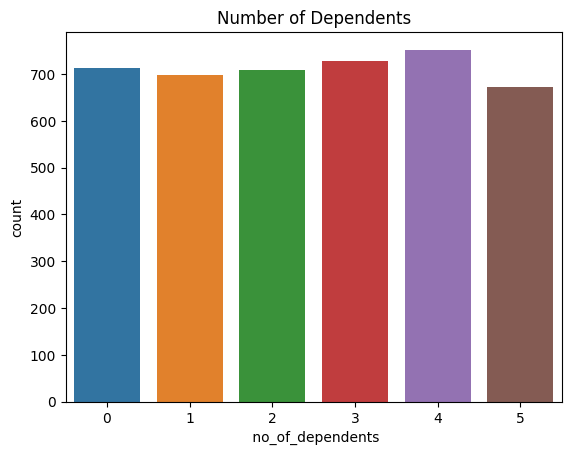

In [52]:
sns.countplot(x = ' no_of_dependents', data = df).set_title('Number of Dependents')

This graph shows the number of dependent indivduals on the loan applicant. There is not much difference in the number of dependents, however, there are more applicants with 4 and 3 dependents than the other categories. Since the number of dependents increases the disposable income of the applicant decreases. So I assume that that the number of applicants with 0 or 1 dependent will have higher chances of loan approval.

<Axes: xlabel=' education', ylabel=' income_annum'>

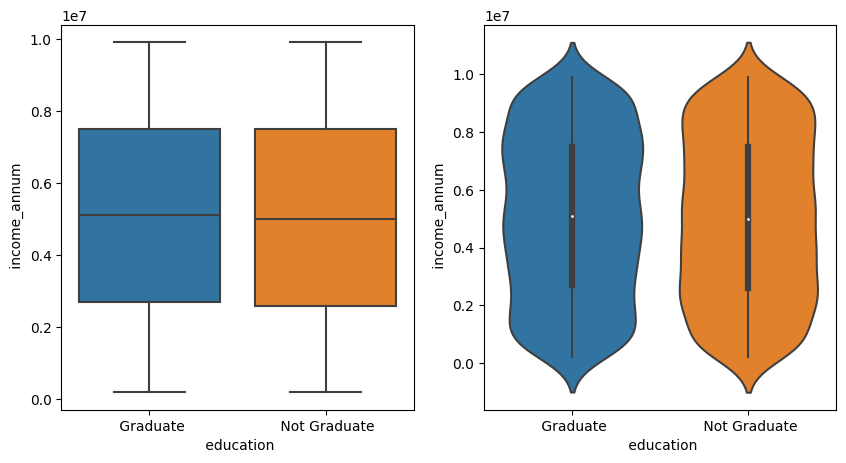

In [53]:
fig, ax = plt.subplots(1,2,figsize=(10, 5))
sns.boxplot(x = ' education', y = ' income_annum', data = df, ax=ax[0])
sns.violinplot(x = ' education', y = ' income_annum', data = df, ax=ax[1])

These two graphs - boxplot and violinplot visualizes the education of applicants along with their annual income. The boxplot shows some interesting fact that both the graduates and non-graduates have nearly same median income with very small increase in income of graduates. Moreover the violinplot shows the distribution of income among the graduates and non graduate applicants, where we can see that non graduate applicants have a even distribution between income 2000000 and 8000000, whereas there is a uneven distribution among the graduates with more applicants having income between 6000000 and 8000000. Since there is not much change in annual income of graduates and non graduates, I assume that education does not play a major role in the approval of loan

Text(0.5, 1.0, 'Self Employed')

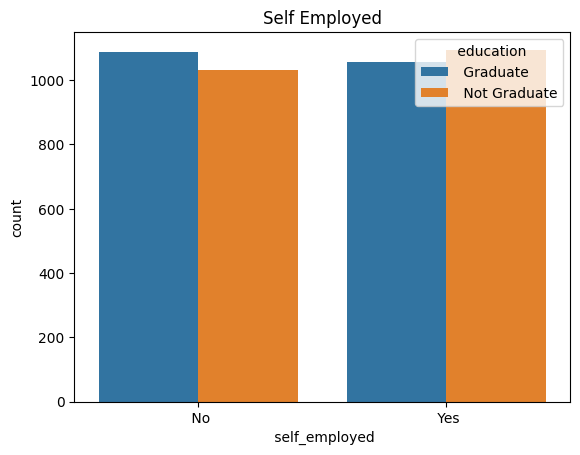

In [54]:
sns.countplot(x=' self_employed', data = df, hue = ' education').set_title('Self Employed')

This graph shows the number of self employed applicants along with their education. From the educational prepespective the majority of the graducate applicants are not self employed wheareas majority of the non-graduates are self employed. This means that graduates applicants are more likely to be salaried employees and non-graduates are more likely to be self employed. This could be a determining factor in loan approval because salaried employees are more likely to have a stable income and hence are more likely to pay back the loan as compared to self employed applicants whose income may not be stable. But this could also be possible that the self employed applicants are earning more than the salaried employees and hence are more likely to pay back the loan. This is a very important factor to consider while predicting the loan approval.

Text(0.5, 1.0, 'Loan Amount vs. Loan Term')

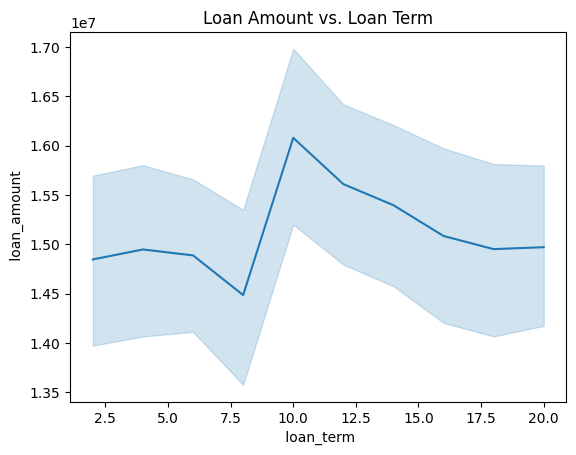

In [55]:
sns.lineplot(x = ' loan_term', y = ' loan_amount', data = df).set_title('Loan Amount vs. Loan Term')

This line plot shows the trend between the loan amount and the loan tenure. Between the loan tenure of 2.5 - 7.5 years the loan amount is between 1400000 - 15500000. However the loan amount is significantly higher for the loan tenure of 10 years.

<Axes: xlabel=' cibil_score', ylabel='Count'>

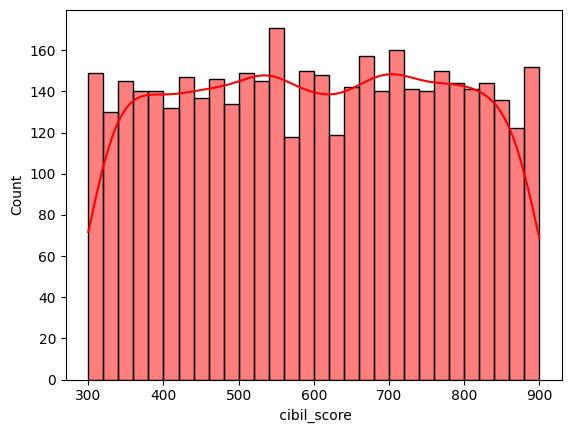

In [56]:
sns.histplot(df[' cibil_score'], bins = 30, kde = True, color = 'red')

Before looking at the cibil score, lets have a look at the cibil score ranges and their meaning.

                       Cibil Score	Meaning
                            300-549	Poor
                            550-649	Fair
                            650-749	Good
                            750-799	Very Good
                            800-900	Excellent
Taking the above table as a reference for the cibil score quality, majority of the customers have cibil score below 649, which affects their loan application. However there are many applicants with cibil score above 649, which is a good sign for the bank. The bank can target these customers and provide them with priority services. The bank can also provide them with special offers and discounts to attract them to take loans from the bank. From this, I build a hypothesis that the customers with cibil score above 649 are more likely to get their loan approved.

<Axes: xlabel='Immovable_assets', ylabel='Count'>

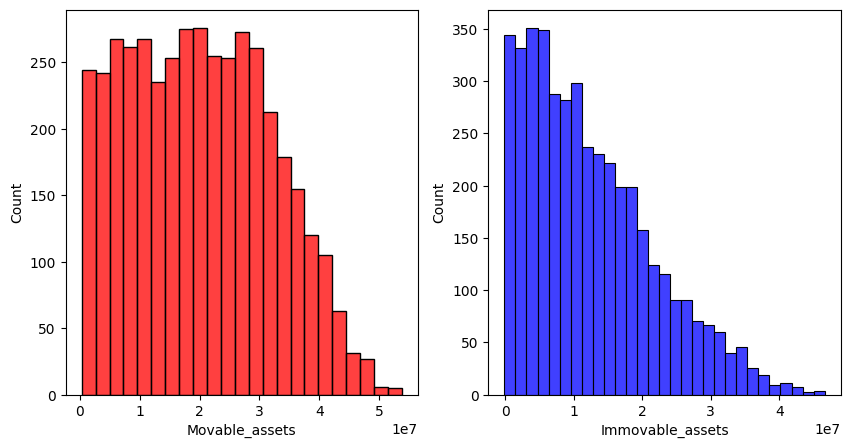

In [57]:
#asset distribution
fig, ax = plt.subplots(1,2,figsize=(10,5))
sns.histplot(df['Movable_assets'], ax=ax[0], color='red')
sns.histplot(df['Immovable_assets'], ax=ax[1], color='blue')

Assets play a major role in loan application. They provides a security to the bank that the person will repay the loan. Looking at the assets, as eralier mentionedI have categorized them in movable and immovable assets. The above graphs shows the distribution of movable and immovable assets in the dataset.

Looking at the movable assets which include bank assets and luxury assets, majority of the applicants have less than 30 million and there is a slight trend of decreasing number of applicants as the movable assets increases. Coming to the immovable assets, which include residential assets and commercial assets, majority of the applicants have less than 15 million of immovable assets and there is a strong trend of decreasing number of applicants as the immovable assets increases after 20 million.

Till now in the EDA, I have explored the distribution of data across the various features as well as relationship between the some of the variables as well and made some assumptions and hypothesis. Now, in order to prove my assumptions and hypothesis I will be looking at the visualization of the relation between the independent variables and the target variable.

<Axes: xlabel=' no_of_dependents', ylabel='count'>

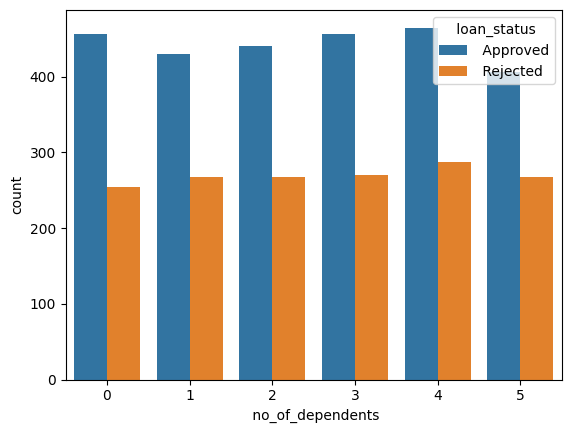

In [58]:
sns.countplot(x = ' no_of_dependents', data = df, hue = ' loan_status')

My hypothesis regarding the loan approval based on number of dependents has mixed results. First the hypothesis was somewhat true regarding the rejection chances, the number of loan rejection increases with increase in number of dependents. But the hypothesis was not true regarding the approval chances, the number of loan approval decreases with increase in number of dependents as per my hypothesis. But according to this graph, there has been no major change in the loan approval count with increase in number of dependents. So, my hypothesis regarding the loan approval based on number of dependents is not true.

Text(0.5, 1.0, 'Loan Status by Education')

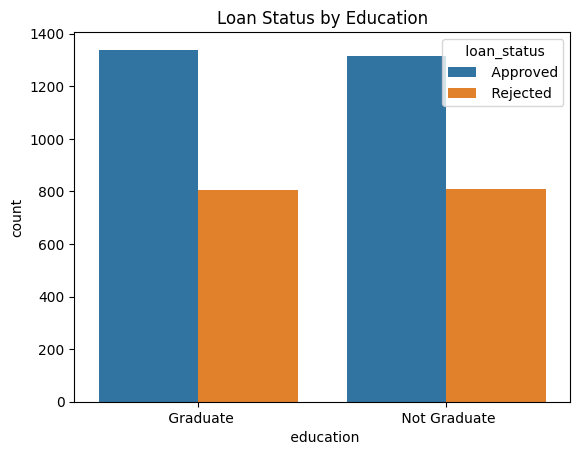

In [59]:
sns.countplot(x = ' education', hue = ' loan_status', data = df).set_title('Loan Status by Education')

My hypothesis regarding the education not being factor in loan approval was right. The graph shows very minor difference between loan approval and rejection count for the graduate and non graduate applicants. The difference is not significant enough.

<Axes: xlabel=' loan_status', ylabel=' income_annum'>

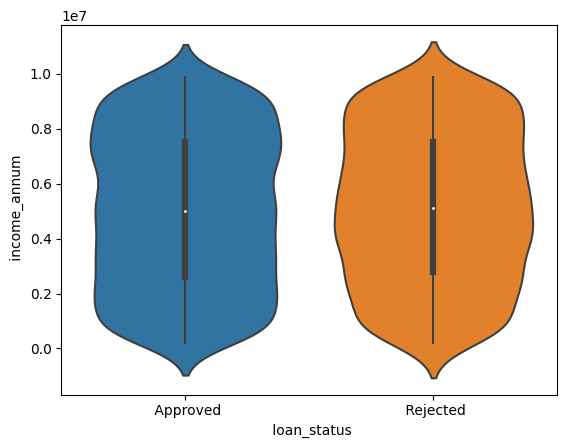

In [60]:
sns.violinplot(x=' loan_status', y=' income_annum', data=df)

On the whole, there has been no major difference between the annual incomes of the applicant with approved or rejected loan. But still, the approved loan applicants tend to have a higher annual income than the rejected loan applicants which is visible from the violin plot where the approved loan applicants have a higher density in the annual income near 8 miilion annual income.

<Axes: xlabel=' loan_term', ylabel=' loan_amount'>

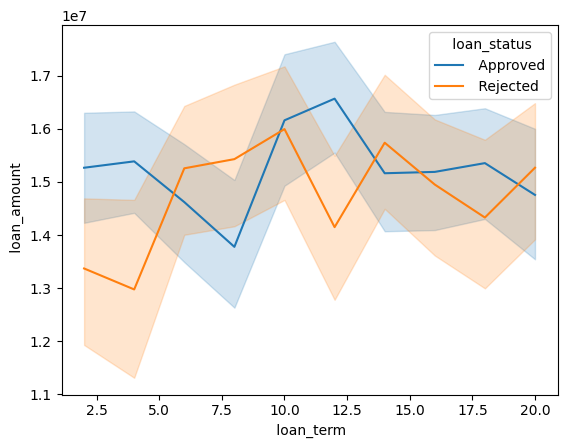

In [61]:
sns.lineplot(x=' loan_term', y=' loan_amount', data=df, hue=' loan_status')

This graph shows the relation between loan amount, loan tenure and loan status. Generally, the approved loans tend have higher amount and shorter repayment tenure. The rejected loans tend to have lower amount and longer repayment tenure. This could be a result of the bank's policy to reject loans with longer repayment tenure. The bank may also reject loans with lower amount as they may not be profitable for the bank.

<Axes: xlabel=' loan_status', ylabel=' cibil_score'>

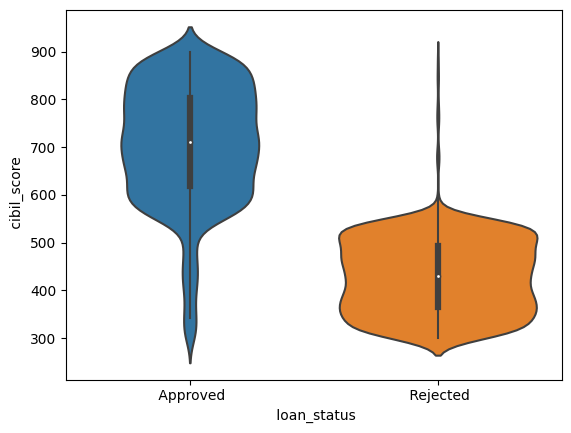

In [62]:
sns.violinplot(x=' loan_status', y=' cibil_score', data=df)

My hypothesis regarding the cibil score and loan approval is absolutely correct. It is evident through the violinplot, where the there is a high distribution above 600 cibil score from the loan approved category. The distribution of the loan not approved category is more spread out and has cibil score less than 550. This also proves my assumption that majority of the applicants have a poor/fair cibil score which affects their loan approval. Hence, having a high cibil score particularly grater than 600 would definitely increase the chances of loan approval.

<Axes: xlabel='Immovable_assets', ylabel='Count'>

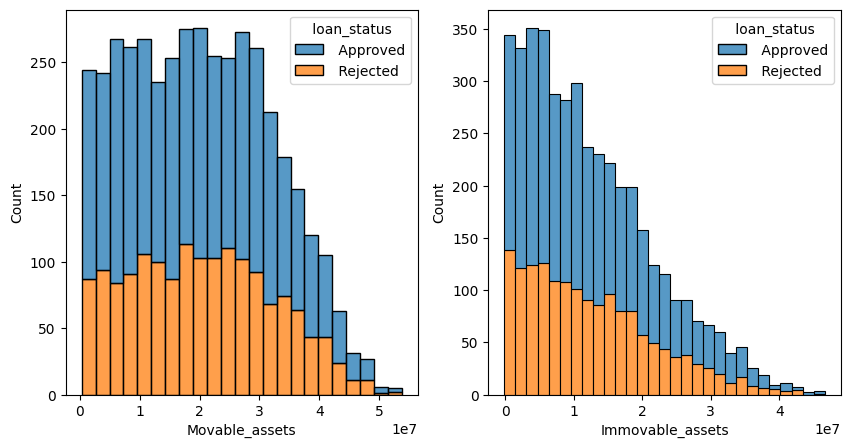

In [63]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
sns.histplot(x  = 'Movable_assets', data = df, ax=ax[0], hue = ' loan_status', multiple='stack')
sns.histplot(x =  'Immovable_assets', data = df, ax=ax[1], hue  = ' loan_status', multiple='stack')

Assets provide security to the bank against which the loan is issued. These two graph visualizes the relation between the movable and immovable assets along with the loan status. The both graph shows that, with increase in the assets the chances of loan approval increases and rejection decreases. The graph also shows that, the movable assets are more than the immovable assets.

# **Data Preprocessing**

**Label Encoding the categorical variables**

In [64]:
# Label Encoding
df[' education'] = df[' education'].map({' Not Graduate':0, ' Graduate':1})
df[' self_employed'] = df[' self_employed'].map({' No':0, ' Yes':1})
df[' loan_status'] = df[' loan_status'].map({' Rejected':0, ' Approved':1})

In [65]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,Movable_assets,Immovable_assets
0,2,1,0,9600000,29900000,12,778,1,30700000,20000000
1,0,0,1,4100000,12200000,8,417,0,12100000,4900000
2,3,1,0,9100000,29700000,20,506,0,46100000,11600000
3,3,1,0,8200000,30700000,8,467,0,31200000,21500000
4,5,0,1,9800000,24200000,20,382,0,34400000,20600000


**Coorelation Matrix using Heatmap**

<Axes: >

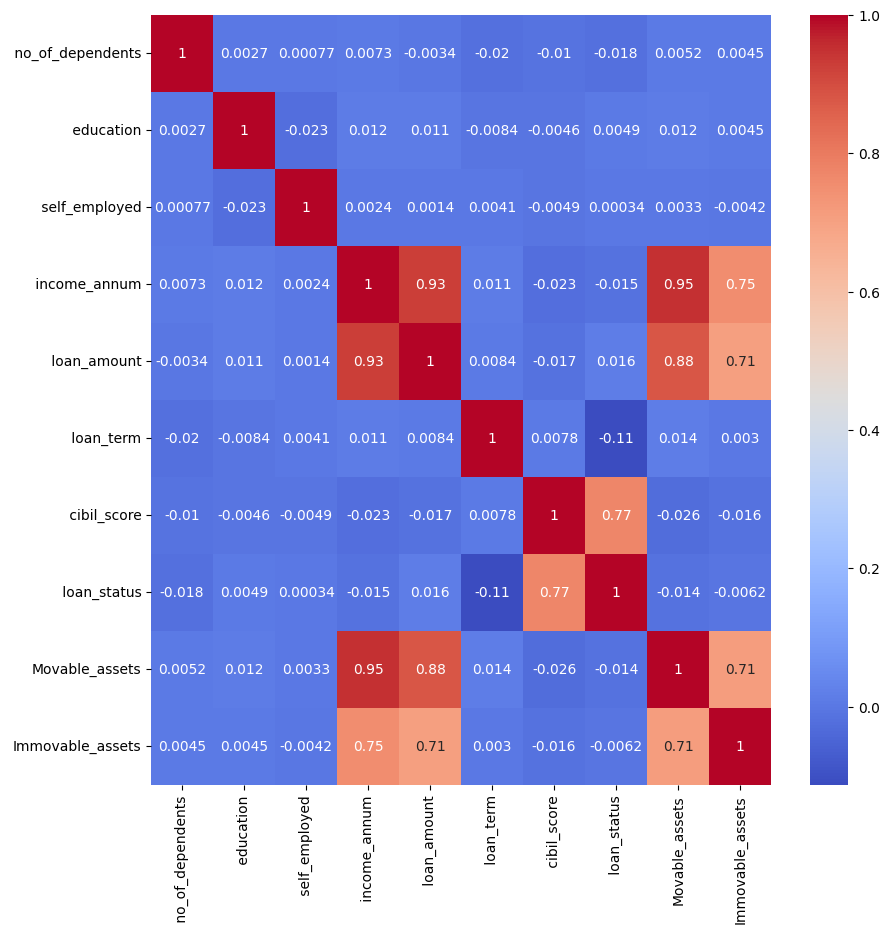

In [66]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot = True,cmap='coolwarm')

This coorelation matrix heatmap has the folowing strong correlations:

1. Movable Assets and Immovable Assets
2. Income and Movable Assets
3. Income and Immovable Assets
4. Movable Assets and Loan Amount
5. Immovable Assets and Loan Amount
6. Loan Status and Cibil Score
7. Loan Amount and Income

The coorelation between the movable and immovable assets is justified because both come under assets and its obvious that person with more movable assets will have more immovable assets and vice versa. Same is with Income and Movables and Immovale assets. The person with greater income will have greater assets.

Now, I will be exploring the coorleation between Assets and Loan Amount, and also between Income and Loan Amount. The relation between the loan status and cibil score is already explored in the previous section.

Text(0.5, 1.0, 'Immovable_assets vs loan_amount')

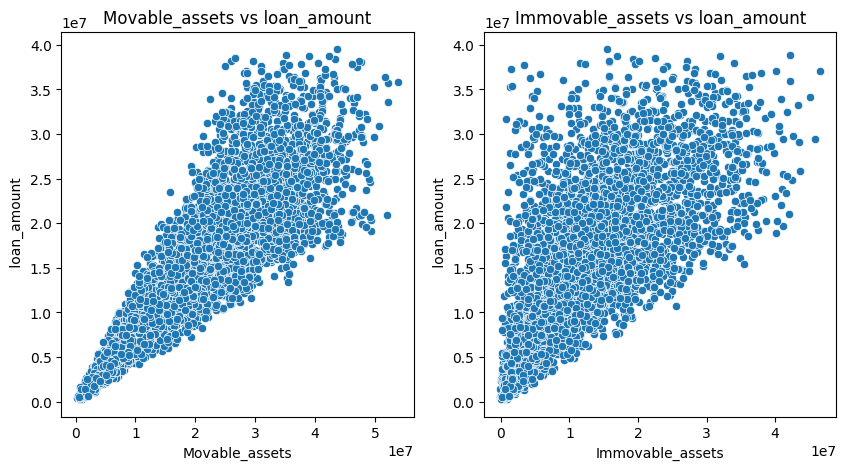

In [67]:
#assets vs loan amount
fig, ax = plt.subplots(1,2,figsize=(10, 5))
sns.scatterplot(x='Movable_assets', y = ' loan_amount', data = df, ax=ax[0]).set_title('Movable_assets vs loan_amount')
sns.scatterplot(x='Immovable_assets', y = ' loan_amount', data = df, ax=ax[1]).set_title('Immovable_assets vs loan_amount')

The loan amount has positive relation with movable and immovable assets. The more the assets, the more the loan amount issued by the bank.

<Axes: xlabel=' income_annum', ylabel=' loan_amount'>

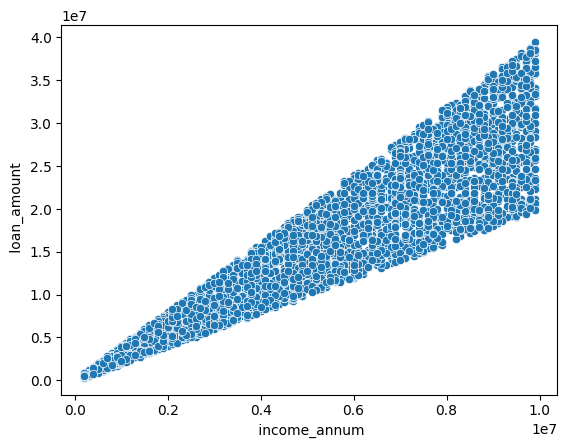

In [68]:
#loan amount vs income
sns.scatterplot(x=' income_annum', y = ' loan_amount', data = df)

The loan amount and applicant's annual income have a very direct relation between them. The higher the income, the higher the loan amount. This is because the applicant's income is the main factor in deciding the how much loan needed.

# **spliting the data**

In [85]:
X = df.drop(' loan_status', axis=1)
y =  df[' loan_status']

In [86]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)


# **Model Building**

I will be using the following machine learning models to predcit the loan approval status:

                      1. Decision Tree Classifier
                      2. Random Forest Classifier

In [87]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

# Create decision tree object
dtree = DecisionTreeClassifier()

In [88]:
# Trainign the model using the training data
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [89]:
# Training Accuracy
#dtree.score(X_train, y_train)
from sklearn.metrics import accuracy_score, f1_score
#we compute the eval metric on test/validation set only primarily

# Predict test set labels
y_pred = dtree.predict(X_test) # Model's predictions

# Compute test set accuracy
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))
print("Test set f1-score: {:.2f}".format(f1))

Test set accuracy: 0.98
Test set f1-score: 0.98


In [90]:
# Predicting the Loan Approval Status
dtree_pred = dtree.predict(X_test)
dtree_pred

array([0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,

In [91]:
##there are 1 param to play with - max depth - to choose the best parameter, I will try different combinations and hoose the one which has the best accuracy/auc/any eval metric on cross-validation or test data-set
from sklearn.model_selection import cross_val_score #this will help me to do cross- validation
import numpy as np

for depth in [1,2,3,4,5,6,7,8,9,10,20,25,30,40,50]:
  dtree = DecisionTreeClassifier(max_depth=depth) # will tell the DT to not grow past the given threhsold
  # Fit dt to the training set
  dtree.fit(X_train, y_train) # the model is trained
  trainAccuracy = accuracy_score(y_train, dtree.predict(X_train)) # this is useless information - i am showing to prove a point
  dt = DecisionTreeClassifier(max_depth=depth) # a fresh model which is not trained yet
  valAccuracy = cross_val_score(dt, X_train, y_train, cv=10) # syntax : cross_val_Score(freshModel,fts, target, cv= 10/5)
  print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))

Depth  :  1  Training Accuracy :  0.9528550512445095  Cross val score :  0.9528596662722301
Depth  :  2  Training Accuracy :  0.9572474377745241  Cross val score :  0.9572473461268028
Depth  :  3  Training Accuracy :  0.9645680819912152  Cross val score :  0.9634022740134796
Depth  :  4  Training Accuracy :  0.9698389458272328  Cross val score :  0.9669110459433039
Depth  :  5  Training Accuracy :  0.9759882869692533  Cross val score :  0.9680883538268936
Depth  :  6  Training Accuracy :  0.9838945827232797  Cross val score :  0.9730651163588344
Depth  :  7  Training Accuracy :  0.9871156661786237  Cross val score :  0.9692579444701686
Depth  :  8  Training Accuracy :  0.9915080527086384  Cross val score :  0.9771672583217577
Depth  :  9  Training Accuracy :  0.9932650073206443  Cross val score :  0.9759968102073365
Depth  :  10  Training Accuracy :  0.9935578330893119  Cross val score :  0.9800920924010906
Depth  :  20  Training Accuracy :  1.0  Cross val score :  0.9841890895371371
D

In [94]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 7)

from matplotlib import pyplot
dtree = DecisionTreeClassifier(max_depth = 5)
# Fit dt to the training set
dtree.fit(X_train, y_train)
importance = dtree.feature_importances_
#pyplot.bar([x for x in range(len(importance))], importance)
list(zip(importance,X_test.columns)) # it calculates the feature importances based on IG

[(0.0, ' no_of_dependents'),
 (0.0, ' education'),
 (0.0, ' self_employed'),
 (0.009732286542560442, ' income_annum'),
 (0.02284243284938312, ' loan_amount'),
 (0.08362710321432673, ' loan_term'),
 (0.8816174867266772, ' cibil_score'),
 (0.0, 'Movable_assets'),
 (0.00218069066705268, 'Immovable_assets')]

[Text(0.5568181818181818, 0.9166666666666666, 'x[6] <= 549.5\ngini = 0.469\nsamples = 3415\nvalue = [1280, 2135]'),
 Text(0.3409090909090909, 0.75, 'x[5] <= 5.0\ngini = 0.186\nsamples = 1415\nvalue = [1268, 147]'),
 Text(0.29545454545454547, 0.5833333333333334, 'x[4] <= 26250000.0\ngini = 0.498\nsamples = 278\nvalue = [131, 147]'),
 Text(0.18181818181818182, 0.4166666666666667, 'x[3] <= 7050000.0\ngini = 0.498\nsamples = 241\nvalue = [128, 113]'),
 Text(0.09090909090909091, 0.25, 'x[4] <= 18400000.0\ngini = 0.495\nsamples = 195\nvalue = [88, 107]'),
 Text(0.045454545454545456, 0.08333333333333333, 'gini = 0.5\nsamples = 169\nvalue = [87, 82]'),
 Text(0.13636363636363635, 0.08333333333333333, 'gini = 0.074\nsamples = 26\nvalue = [1, 25]'),
 Text(0.2727272727272727, 0.25, 'x[4] <= 21850000.0\ngini = 0.227\nsamples = 46\nvalue = [40, 6]'),
 Text(0.22727272727272727, 0.08333333333333333, 'gini = 0.0\nsamples = 29\nvalue = [29, 0]'),
 Text(0.3181818181818182, 0.08333333333333333, 'gini = 0.

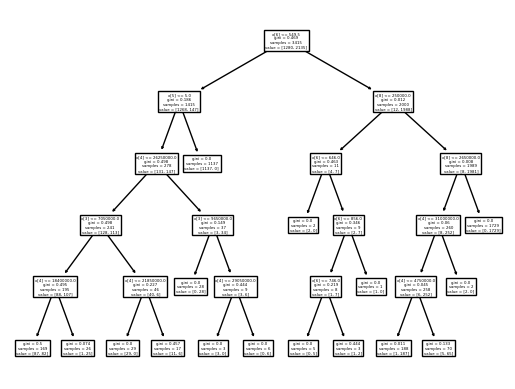

In [96]:
from sklearn import tree
tree.plot_tree(dtree) # dt is the decison tree that I have learnt

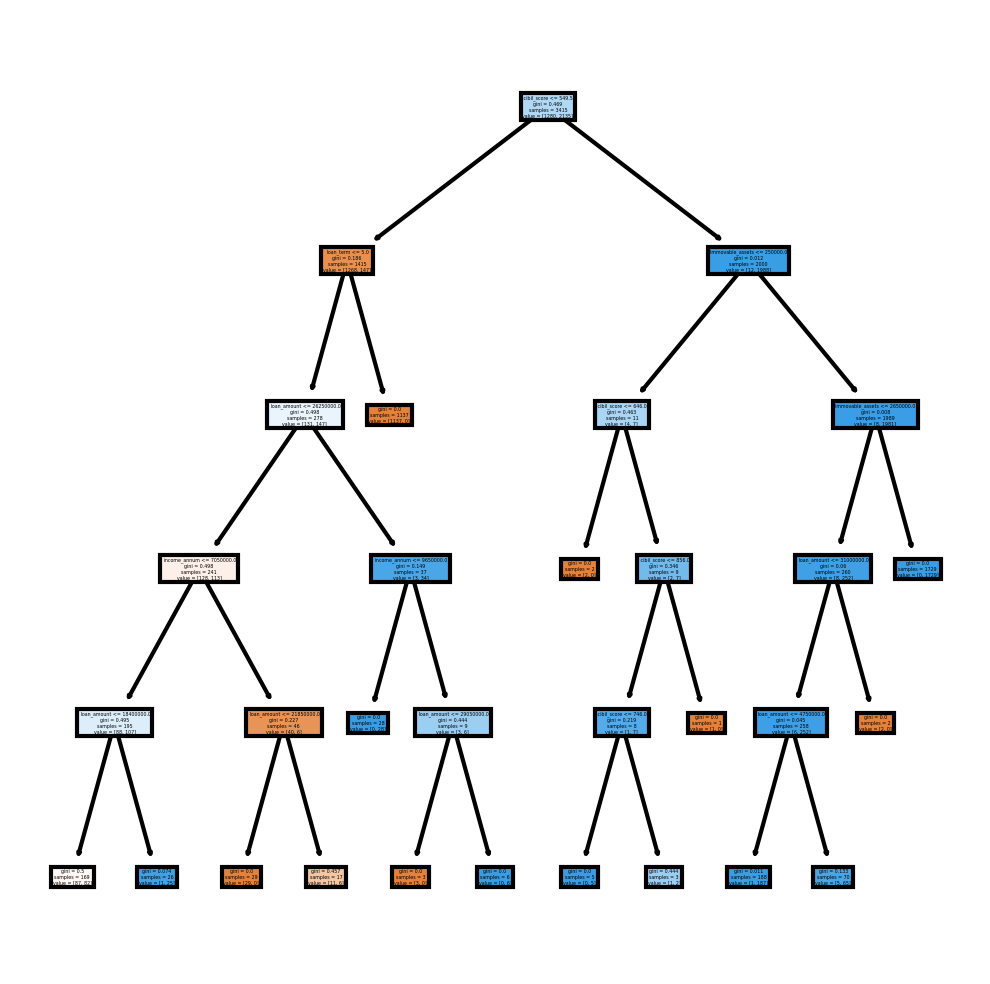

In [97]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(dtree,
               feature_names = X_test.columns,
               filled = True);
fig.savefig('imagename.png')

In [99]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Create a random forest classifier
rfc = RandomForestClassifier()

In [100]:
# Training the model using the training data
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [101]:
# Training Accuracy
rfc.score(X_train, y_train)

1.0

In [102]:
# Training Accuracy
#dtree.score(X_train, y_train)
from sklearn.metrics import accuracy_score, f1_score
#we compute the eval metric on test/validation set only primarily

# Predict test set labels
y_pred = rfc.predict(X_test) # Model's predictions

# Compute test set accuracy
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))
print("Test set f1-score: {:.2f}".format(f1))

Test set accuracy: 0.99
Test set f1-score: 0.99


In [103]:
# Predicting the Loan Approval Status
rfc_pred = rfc.predict(X_test)

# **Model Evalution**

Text(518.4494949494949, 0.5, 'Actual')

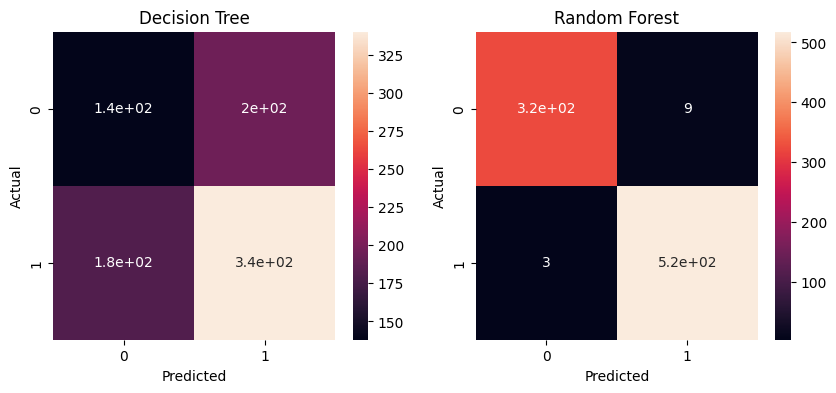

In [104]:
from sklearn.metrics import confusion_matrix

fig, ax = plt.subplots(1,2,figsize=(10,4))
sns.heatmap(confusion_matrix(y_test, dtree_pred), annot=True, ax=ax[0]).set_title('Decision Tree')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')
sns.heatmap(confusion_matrix(y_test, rfc_pred), annot=True, ax=ax[1]).set_title('Random Forest')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')

The above confusion matrix heatmap visualizes the the true positive and true negative value counts in both the machine learning models. The decision tree classfier has only 17 false positve and negative valyes where has random forest classifier has 21 false postive and negative values. The decision tree classifier has a better accuracy compared to random forest classifier.

<ipython-input-105-ce1fafec40e9>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot( x = y_test, hist = False, color = "r", label = "Actual Value")
<ipython-input-105-ce1fafec40e9>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( x = dtree_pred, hist = False, color = "b", l

Text(0.5, 1.0, 'Actual vs Fitted Values for Decsion Tree Classfier')

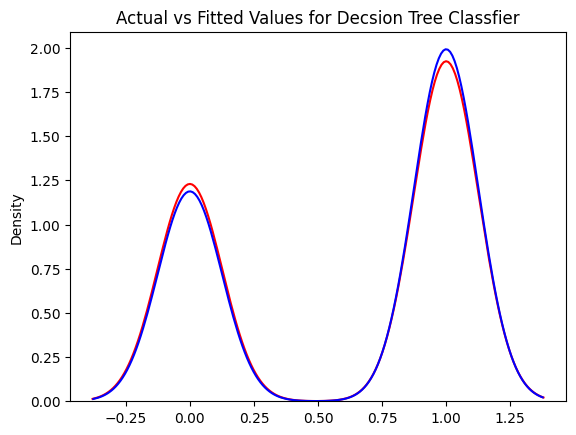

In [105]:
#distribution plot

ax = sns.distplot( x = y_test, hist = False, color = "r", label = "Actual Value")
sns.distplot( x = dtree_pred, hist = False, color = "b", label = "Fitted Values", ax = ax)
plt.title('Actual vs Fitted Values for Decsion Tree Classfier')

<ipython-input-106-3a716ab27357>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot( x = y_test, hist = False, color = "r", label = "Actual Value")
<ipython-input-106-3a716ab27357>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( x = rfc_pred, hist = False, color = "b", lab

Text(0.5, 1.0, 'Actual vs Fitted Values for Random Forest Classfier')

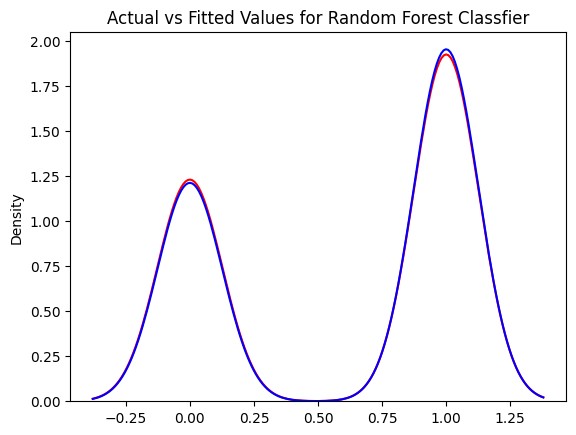

In [106]:
ax = sns.distplot( x = y_test, hist = False, color = "r", label = "Actual Value")
sns.distplot( x = rfc_pred, hist = False, color = "b", label = "Fitted Values", ax = ax)
plt.title('Actual vs Fitted Values for Random Forest Classfier')

# classification

In [107]:
from sklearn.metrics import classification_report

print(classification_report(y_test, dtree_pred))
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.43      0.41      0.42       333
           1       0.64      0.65      0.64       521

    accuracy                           0.56       854
   macro avg       0.53      0.53      0.53       854
weighted avg       0.56      0.56      0.56       854

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       333
           1       0.98      0.99      0.99       521

    accuracy                           0.99       854
   macro avg       0.99      0.98      0.99       854
weighted avg       0.99      0.99      0.99       854



In [109]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Assuming y_test, dtree_pred, and rfc_pred are your true labels and predicted labels for the classification task

# Decision Tree Classifier
print('Accuracy Score (Decision Tree): ', accuracy_score(y_test, dtree_pred))
print('Precision Score (Decision Tree): ', precision_score(y_test, dtree_pred))
print('Recall Score (Decision Tree): ', recall_score(y_test, dtree_pred))
print('F1 Score (Decision Tree): ', f1_score(y_test, dtree_pred))
print('ROC AUC Score (Decision Tree): ', roc_auc_score(y_test, dtree_pred))
print('Confusion Matrix (Decision Tree):\n', confusion_matrix(y_test, dtree_pred))
print('\n')

# Random Forest Classifier
print('Accuracy Score (Random Forest): ', accuracy_score(y_test, rfc_pred))
print('Precision Score (Random Forest): ', precision_score(y_test, rfc_pred))
print('Recall Score (Random Forest): ', recall_score(y_test, rfc_pred))
print('F1 Score (Random Forest): ', f1_score(y_test, rfc_pred))
print('ROC AUC Score (Random Forest): ', roc_auc_score(y_test, rfc_pred))
print('Confusion Matrix (Random Forest):\n', confusion_matrix(y_test, rfc_pred))


Accuracy Score (Decision Tree):  0.5597189695550351
Precision Score (Decision Tree):  0.6355140186915887
Recall Score (Decision Tree):  0.6525911708253359
F1 Score (Decision Tree):  0.6439393939393939
ROC AUC Score (Decision Tree):  0.5335027926198752
Confusion Matrix (Decision Tree):
 [[138 195]
 [181 340]]


Accuracy Score (Random Forest):  0.9859484777517564
Precision Score (Random Forest):  0.9829222011385199
Recall Score (Random Forest):  0.9942418426103646
F1 Score (Random Forest):  0.9885496183206106
ROC AUC Score (Random Forest):  0.983607407791669
Confusion Matrix (Random Forest):
 [[324   9]
 [  3 518]]


# **Feature Importance**

In [110]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 7)

from matplotlib import pyplot
dtree = DecisionTreeClassifier(max_depth = 5)
# Fit dt to the training set
dtree.fit(X_train, y_train)
importance = dtree.feature_importances_
#pyplot.bar([x for x in range(len(importance))], importance)
list(zip(importance,X_test.columns)) # it calculates the feature importances based on IG

[(0.0, ' no_of_dependents'),
 (0.0, ' education'),
 (0.0, ' self_employed'),
 (0.009732286542560442, ' income_annum'),
 (0.02284243284938312, ' loan_amount'),
 (0.08362710321432673, ' loan_term'),
 (0.8804273396545844, ' cibil_score'),
 (0.0011901470720927353, 'Movable_assets'),
 (0.00218069066705268, 'Immovable_assets')]

In [112]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 7)

from matplotlib import pyplot
rfc = RandomForestClassifier(max_depth = 5)
# Fit dt to the training set
rfc.fit(X_train, y_train)
importance = rfc.feature_importances_
#pyplot.bar([x for x in range(len(importance))], importance)
list(zip(importance,X_test.columns)) # it calculates the feature importances based on IG

[(0.002907315887586836, ' no_of_dependents'),
 (0.0005230719465348971, ' education'),
 (0.0010132672663382128, ' self_employed'),
 (0.014143025106065247, ' income_annum'),
 (0.017882306870236724, ' loan_amount'),
 (0.0740352024276904, ' loan_term'),
 (0.8682400394590273, ' cibil_score'),
 (0.008610859511178872, 'Movable_assets'),
 (0.01264491152534142, 'Immovable_assets')]

# **conclusion**


From the exploratory data analysis, we can conclude that the following factors are important for the approval of loan:

                        CIBIL Score: People with higher CIBIL score have higher chances of loan approval
                        Number of Dependents: People with more number of dependents have less chances of loan approval
                        Assets: People with more assets ( including movable and immovable) have higher chances of loan approval
                        Loan Amount and Tenure: People with higher loan amount and lower tenure have more chances of loan approval
Coming to the machine learning models, I have used Decision Tree Classifier and Random Forest Classifier. Both the models have given results having ROC AUC Score - 53.3 % and 98.3 % repectively. But the decision tree classifier has yielded better results than the random forest classifier.